# Clean and Analyze Employee Exit Surveys

The project is part of the course by [Dataquest.io](https://dataquest.io). The project is working with exit surveys from employees of the Department of Education, Training and Employement (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Some changes have been made by Dataquest on the original datasets for learning purposes.

**Datasets**
- [DETE Exit Surveys](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
- [TAFE Exit Surveys](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

**Research Questions**
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

**DETE Sample Data Dictionary**

|Name|Description|
|:----|:----|
|`ID`|An id used to identify the participant of the survey|
|`SeparationType`|The reason why the person's employment ended|
|`Cease Date`|The year or month the person's employment ended|
|`DETE Start Date`|The year the person began employment with the DETE|

**TAFE Sample Data Dictionary**

|Name|Description|
|:----|:-----|
|`Record ID`| An id used to identify the participant of the survey|
|`Reason for ceasing employment`|The reason why the person's employment ended|
|`LengthofServiceOverall. Overall Length of Service at Institute (in years)`|The length of the person's employment (in years)|

## 1. Introduction
Reading the files, performing the initial data exploration and data analysis.

In [76]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
## reading the cvs into pandas DataFrame
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [78]:
## gathering info about the dataframes
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [79]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [80]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [81]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Both datasets are containing similar data, about the same lenght. DETE is having 822 entries and TAFE 702 entries. From intial preview it seems that TAFE survey is messier. The header row contains duplicities, the values in the dataset are in wrong formats. Biggest issues:
- DETE survey contains `Not Stated` value in the date columns
- Both surveys contains similar data in columns called differently
- Both surveys have many columns that we don't need for the analysis
- Both surveys contains more than column that might indicate dissatisfaction 

## 2. Missing Values & Dropping Unnecessary Columns
Since the date column in the DETE survey was containg not null vaue stored in not recognizing format ("Not Stated") I will convert the values into NaN to work better with the date data. I will also drop the unnecessary columns from both surveys that are not contributing to the analysis questions stated in the introduction.

In [82]:
## reading the DETE survey into pandas DataFrame
### setting the "Not Stated" value to NaN
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [83]:
## dropping unncecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

print(dete_survey_updated.columns)
print("\n")
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fa

## 3. Uniting column names
Each dataset contains many of the same columns, but the names are different. Before merging the datasets together I will unite the column names. The columns for analysis are following:


|dete_survey|tafe_survey|Definition|
|:---|:---|:---|
|ID|Record ID| An id used to identify the participant of the survey|
|SeparationType|Reason for ceasing employment|The reason why the participant's employment ended|
|Cease Date|CESSATION YEAR|The year or month the participant's employment ended|
|DETE Start Date||The year the participant began employment with the DETE|
||LengthofServiceOverall. Overall Length of Service at Institute (in years)|The length of the person's employment (in years)|
|Age|CurrentAge.Current Age|The age of the participant|
|Gender|Gender. What is your Gender?|The gender of the participant|


In [84]:
## DETE survey cleaning column names
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.replace(" ", "_")
                               .str.strip()
                               .str.lower()
                              )
## checking the updated column names
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [85]:
## TEFE survey cleaning columns
tefe_mapping_dic = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(tefe_mapping_dic, axis=1)

## checking updated columns names
tafe_survey_updated.columns


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## 4. Filtered View
The goal is to answer what contributing factors are responsible for emplyoees to resign. Hence I will filter out values that are not "resignation" type of values. In other words - I only want to keep values where employee resigned. Both survey have column named `separationtype` that specifies the type of employer-employee separation.

In [86]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [87]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

### 4.1 Filtered view DETE survey
DETE survey has three types of resignation. `Resignation-Other reasons`, `Resignation-Other employer` and `Resignation-Move overseas/interstate`. I will store all of them in a new dataframe. 

In [88]:
## updating the Resignation reasons to contain only the resignation word
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str.split("-").str[0]
dete_survey_updated["separationtype"].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [89]:
dete_resignations = dete_survey_updated.copy()[dete_survey_updated["separationtype"]=="Resignation"]

## control check
dete_resignations["separationtype"].value_counts()

Resignation    311
Name: separationtype, dtype: int64

### 4.2 Filtered view TAFE survey
TAFE survey has only one value with the word Resignation.

In [90]:
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated["separationtype"] == "Resignation"]

## control check
tafe_resignations["separationtype"].value_counts()

Resignation    340
Name: separationtype, dtype: int64

## 5. Verifying the data
In this step I will verify the `cease_date` and `dete_start_date` values. The cease date is the date person left the company. Logically the values must be highter than the start date. I will also check whether there are some dates before the year 1940 and posiblly drop these.

### 5.1 DETE survey

In [91]:
## saving the cease year in a new column
dete_resignations["cease_year"] = dete_resignations["cease_date"].str.split("/").str[-1].astype(float)

## counting unique years in cease year
dete_resignations["cease_year"].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_year, dtype: int64

In [92]:
## counting unique years in start date
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

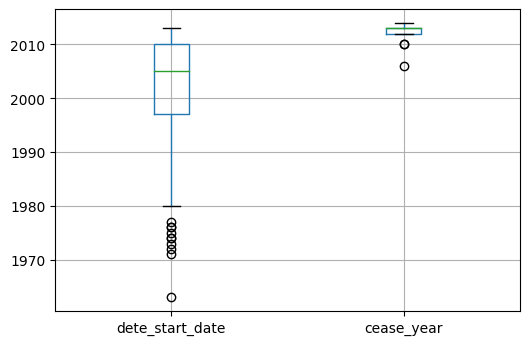

In [93]:
dete_boxplot = dete_resignations.boxplot(column=["dete_start_date","cease_year",])

### 5.2 TAFE survey

In [94]:
## counting unique years in cease year
tafe_resignations["cease_date"].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

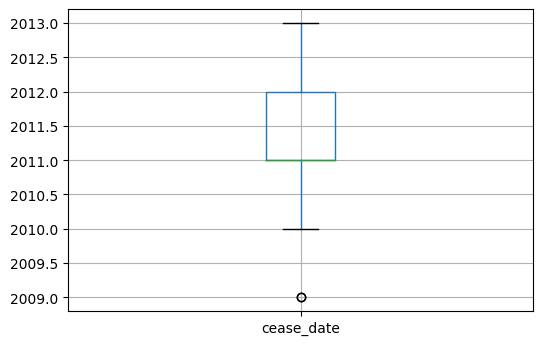

In [95]:
tafe_boxplot = tafe_resignations.boxplot("cease_date")

There aren't any major issues with the years. The years in each dataframe do not span for the same years so we can't really compare the two datasets.

## 6. Creating new column
One of the research question was:
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

To answer this we need to know *years of service* of each employee. The years of service is difference between the cease date and start date. TAFE survey already contains column `institute_service`. I'll create similar column in the DETE dataset.

In [96]:
## crating new column institute_service with service years
dete_resignations["institute_service"] = dete_resignations["cease_year"] - dete_resignations["dete_start_date"]

## checking the first 5 values of the new column
dete_resignations["institute_service"].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## 7. Identifying Dissatisfied Employees
In this step I'll identify employees who resigned because they were dissatisfied with some factors. Bellow are columns that contribute to employee dissatisfaction.

**DETE Survey**
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

**TAFE Survey**
- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

If the employee indicated any of the factors above caused them to resign, weI'll mark them as dissatisfied in a new column. The changes are:
– `True`: indicates a person resigned because they were dissatisfied in some way
- `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
- `NaN`: indicates the value is missing

### 7.1 TAFE survey

In [97]:
## exploring the values in the contributin factors
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [98]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [99]:
## updating values contributin factors to True, False, NaN
def update_vals(x):
    if x == "-":
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

tafe_resignations["dissatisfied"] = (tafe_resignations[["Contributing Factors. Dissatisfaction", 
                                                        'Contributing Factors. Job Dissatisfaction']]
                                     .applymap(update_vals)
                                     .any(axis=1, skipna=False)
                                    )
tafe_resignations_up = tafe_resignations.copy()

tafe_resignations_up["dissatisfied"].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

### 7.2 DETE survey

In [100]:
dete_resignations["dissatisfied"] = (dete_resignations[["job_dissatisfaction", "dissatisfaction_with_the_department",
                                                       "physical_work_environment", "lack_of_recognition",
                                                       "lack_of_job_security", "work_location", "employment_conditions",
                                                       "work_life_balance", "workload"]]
                                     .any(axis=1, skipna=False)
                                    )

dete_resignations_up = dete_resignations.copy()
dete_resignations_up["dissatisfied"].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

## 8. Combining the surveys
The goal is to aggregate the data according to the `institute_service` column.

In [101]:
## adding institu column to each dataframe with the insitute naem
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [102]:
## combining the dataframes together
combined = pd.concat([dete_resignations_up, tafe_resignations_up],ignore_index=True)

## checking for the non-null values
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
cease_year                                             300
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           3

In [103]:
## dropping values with less than 500 non-null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [104]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    object 
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(1), object(9)
memory usage: 51.0+ KB


The final combined dataframe is stored as `combined_updated` with 10 columns and total of 651 entries. 

## 9. Cleaning the Service Column
Before moving to analysis I'll need to clean up the `institute_service` column. The column contains various formats.

In [105]:
combined_updated["institute_service"].value_counts(dropna=False).head(10)

NaN                 88
Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
11-20               26
5.0                 23
1.0                 22
7-10                21
3.0                 20
Name: institute_service, dtype: int64

I'll modify the column and apply this logic:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [106]:
## converting the values to string
combined_updated["institute_service_up"] = (combined_updated["institute_service"]
                                         .astype("str")
                                         .str.extract(r"(\d+)")
                                        )

combined_updated["institute_service_up"] = combined_updated["institute_service_up"].astype(float)
combined_updated["institute_service_up"].value_counts().head(10)

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
Name: institute_service_up, dtype: int64

In [107]:
## Function to map value to the career stage
def career_stage(x):
    if x >= 11:
        return "Veteran"
    elif 7 <= x < 11:
        return "Established"
    elif 3 <= x < 7:
        return "Experienced"
    elif pd.isnull(x):
        return np.nan
    else:
        return "New"


combined_updated["service_cat"] = (combined_updated["institute_service_up"]
                                   .apply(career_stage)
                                  )

combined_updated["service_cat"].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## 10. Initial Analysis

In [108]:
## Unique values in the dissatisfied column
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [109]:
## Replacing 8 NaN values with the most common value: False
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

In [110]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

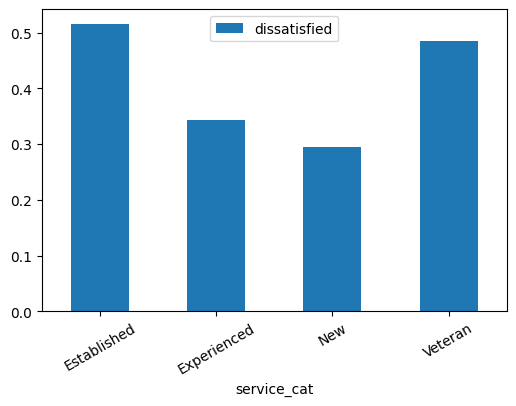

In [111]:
combined_updated_pv = combined_updated.pivot_table(values="dissatisfied", index="service_cat")

combined_updated_pv.plot(kind="bar", rot=30)

## 11. Continuous analysis
With the point 10 the guided project ends. From now on the analysis is part of my own further research. The questions I'll investigate are:
1. what role plays age in employees resignations
2. what role plays gender in employee resigntations
3. what are the most common positions employees resign from
4. what institute have more dissatisfied employees

### 11.1 Age
The age column contains data in several formats. I'll clean the data and the create age buckets. The age groups will be:
- 20s: for employees in their 20s and younger (> 29)
- 30s: for employees in their 30s (30-39)
- 40s: for employees in their 40s (40-49)
- 50s: for employees in their 50s (50-59)
- 60s and older: for employees in their 60s and older (60+)

In [132]:
## examining the age column
combined_updated["age"].value_counts(dropna=False).sort_index()

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
NaN              55
Name: age, dtype: int64

In [133]:
## converting to string and extracting age
combined_updated["age_up"] = (combined_updated["age"]
                              .astype("str")
                              .str.extract(r"(\d+)")
                             )
## converting the age to float
combined_updated["age_up"] = combined_updated["age_up"].astype(float)

## check
combined_updated["age_up"].value_counts(dropna=False).sort_index()

20.0    10
21.0    62
26.0    67
31.0    61
36.0    73
41.0    93
46.0    81
51.0    71
56.0    55
61.0    23
NaN     55
Name: age_up, dtype: int64

In [134]:
## creating function to sort the age values
def sort_age(x):
    if x >= 60:
        return "60s and older"
    elif 50 <= x < 60:
        return "50s"
    elif 40 <= x < 50:
        return "40s"
    elif 30 <= x < 40:
        return "30s"
    elif pd.isnull(x):
        return np.nan
    else:
        return "20s"
    
combined_updated["age_bucket"] = combined_updated["age_up"].apply(sort_age)

age_dist = combined_updated["age_bucket"].value_counts().sort_index()


#### 11.1.1 Age distribution when resigning and dissatisfaction

In [135]:
age_pv_sns = (pd.pivot_table(combined_updated,
                             values=["id","dissatisfied"],
                             index="age_bucket",
                             columns = [],
                             aggfunc={"id": np.count_nonzero, "dissatisfied" : np.mean }, 
                             margins=False).fillna(''))

cm = sns.light_palette("green", as_cmap=True)
age_pv_sns.style.background_gradient(cmap=cm)


,dissatisfied,id
age_bucket,,
20s,0.352518,139.000000
30s,0.358209,134.000000
40s,0.379310,174.000000
50s,0.404762,126.000000
60s and older,0.521739,23.000000


From the table above we can say that the most dissatisfied are employees in their 60s and older. The older the employee is, more dissatisfied they are. Most employees are leaving in their 40s.

### 11.2 Gender

In [141]:
## setting the NaN values of gender to Unknown / Not specified
combined_updated["gender"] = combined_updated["gender"].fillna("Unknown / Not Specified")

In [140]:
combined_updated["gender"].value_counts()

Female                     424
Male                       168
Unknown / Not Specified     59
Name: gender, dtype: int64

In [143]:
gender_pv_sns = (pd.pivot_table(combined_updated,
                             values=["id","dissatisfied"],
                             index="gender",
                             columns = [],
                             aggfunc={"id": np.count_nonzero, "dissatisfied" : np.mean }, 
                             margins=False).fillna(''))

cm = sns.light_palette("green", as_cmap=True)
gender_pv_sns.style.background_gradient(cmap=cm)

,dissatisfied,id
gender,,
Female,0.370283,424.000000
Male,0.398810,168.000000
Unknown / Not Specified,0.271186,59.000000


Even though there is more twice more women resigning the data does not show that women are more dissatisfied than men. Let's have a look at the age when women are leaving. It can be that women are leaving because of taking care of childern. However patriachal it is...

#### 11.2.1 Age of women who resigned

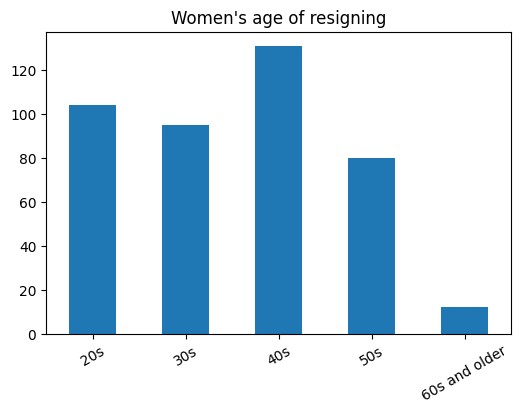

In [159]:
females = combined_updated[combined_updated["gender"] == "Female"]
females["age_bucket"].value_counts().sort_index().plot(kind="bar", rot=30, title="Women's age of resigning")

It seems that woman's age does not play any significant role. The ages gorups are somewhat evenly distributed and no group have significantly higher values.

### 11.3 Positions

In [165]:
combined_updated["position"].value_counts(dropna=False)

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
NaN                                                         53
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
Workplace Training Officer                                   6
School Based Professional Staff (Therapist, nurse, etc)      5
Technical Officer (TO)                                 

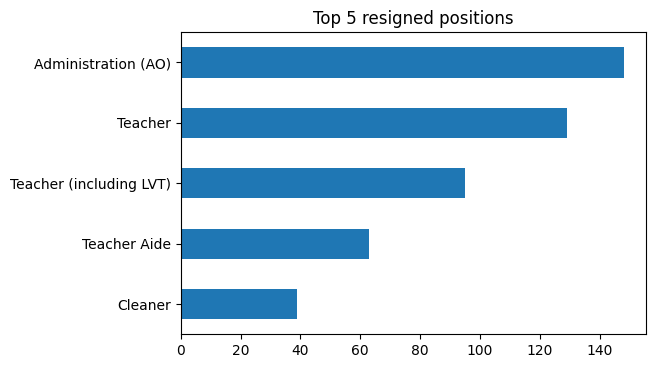

In [167]:
postions = (combined_updated["position"].value_counts()
            .head().sort_values(ascending=True)
            .plot(kind="barh", title="Top 5 resigned positions")
           )

Most employees are leaving administration and teaching positions.

### 11.4 Institute dissatisfaction
What is the overall dissatisfaction rate among the two institutes?

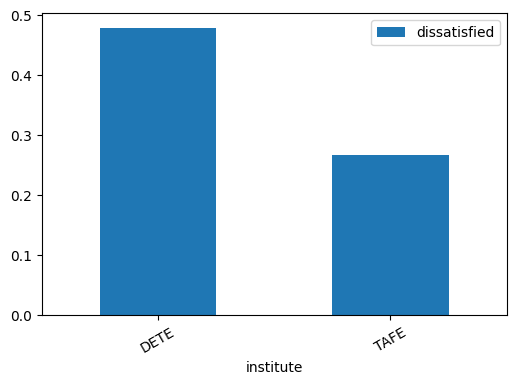

In [177]:
insitute_pv = combined_updated.pivot_table(values="dissatisfied", index="institute")
insitute_pv.plot(kind="bar", rot=30)

From the data it shows that the DETE institue have more dissatisfied employees than TAFE.

## 12. Conclusion
The analysis showed that:
- employees who are with the company for more than 7 years shows higher dissatisfaction rate
- most people resign in their 40s, but employees over 60 are the most dissatisfied ones
- there is no difference between the genders
- most resigned positions are among the administration and teacher
- DETE institute has more dissatisfied former employees